# **Actividad 2:**

# Clasificación con máquinas de vectores de soporte y random forest

### Análisis descriptivo de los datos

In [47]:
!pip install ucimlrepo

In [48]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [49]:
# se carga el dataset
#covertype = fetch_ucirepo(id=31)
#print((covertype.variables["name"]) )
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.data.gz'
#Nombres de las columnas según la documentación en el sitio web
nonbre_columnas = ["Elevation", "Aspect", "Slope", "Horizontal_Distance_To_Hydrology",
                "Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways",
                "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm",
                "Horizontal_Distance_To_Fire_Points"] + \
                ["Wilderness_Area_" + str(i) for i in range(1,5)] + \
                ["Soil_Type_" + str(i) for i in range(1,41)] + ["Cover_Type"]
covertype = pd.read_csv(url, header=None, names=nonbre_columnas)
covertype

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


# ¿Cuántas instancias de datos tiene el dataset?

In [ ]:
#. 581012 instancias o registros(filas/rows)

# ¿Cuántas variables continuas hay en el dataset?

Son 10 variable continuas



In [50]:
variables_continuas = [
    "Elevation", "Aspect", "Slope", "Horizontal_Distance_To_Hydrology",
    "Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways",
    "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm",
    "Horizontal_Distance_To_Fire_Points"
]

# ¿Cuántas variables categóricas hay en el dataset? Indica las categorías.

### **Hay 44 variables categoricas**: **4** Wilderness_Area_1 a 5 y **40** que son Soil_Type_1 a 40

# ¿Cómo es la distribución de etiquetas de clase en el dataset? Con estos datos, ¿podríamos decir que el dataset está balanceado?

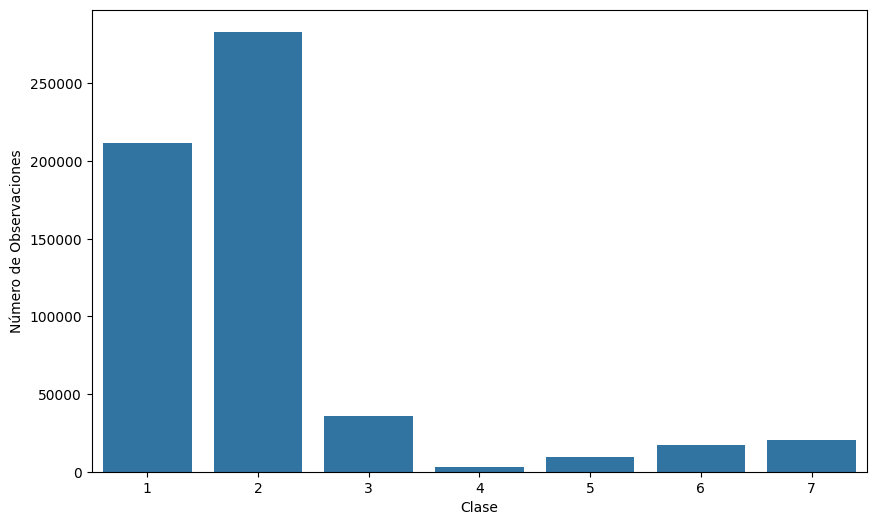

Cover_Type
2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: count, dtype: int64


In [51]:
dist_clases = covertype['Cover_Type'].value_counts()

# Gráfico de barras para la distribución de etiquetas de clase
plt.figure(figsize=(10, 6))
sns.countplot(covertype, x='Cover_Type')
plt.xlabel('Clase')
plt.ylabel('Número de Observaciones')
plt.show()

print(dist_clases)

**Existe mucha variabilidad entre clases, por lo cual, no es balanceado el dataset.**


# ¿Existe alguna variable altamente correlacionada con la variable de clase?

In [52]:
# Calcular la correlación entre todas las variables
matriz_corr = covertype.corr()

# Correlación de cada variable con la variable de clase (Cover_Type)
clase_corr = matriz_corr['Cover_Type'].sort_values(ascending=False)

clase_corr

Cover_Type                            1.000000
Wilderness_Area_4                     0.323200
Soil_Type_10                          0.243876
Soil_Type_38                          0.160170
Soil_Type_39                          0.155668
Slope                                 0.148285
Soil_Type_40                          0.128351
Soil_Type_2                           0.118135
Soil_Type_6                           0.112958
Soil_Type_4                           0.099672
Soil_Type_1                           0.090828
Soil_Type_17                          0.090582
Vertical_Distance_To_Hydrology        0.081664
Soil_Type_35                          0.080315
Soil_Type_37                          0.080271
Soil_Type_5                           0.077890
Soil_Type_3                           0.068064
Wilderness_Area_3                     0.066846
Soil_Type_14                          0.065562
Soil_Type_11                          0.035379
Soil_Type_36                          0.025397
Soil_Type_13 

In [53]:
# Ya habia separado en este arreglo las variables continuas
variables_continuas = [
    "Elevation", "Aspect", "Slope", "Horizontal_Distance_To_Hydrology",
    "Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways",
    "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm",
    "Horizontal_Distance_To_Fire_Points"
]

# Filtrar las columnas continuas y la variable de clase
datos_continuous = covertype[variables_continuas + ['Cover_Type']]

# Calcular la matriz de correlación
matriz_corr = datos_continuous.corr()

# Obtener la correlación de cada variable con la variable de clase (Cover_Type)
clase_corr = matriz_corr['Cover_Type'].sort_values(ascending=False)

clase_corr

Cover_Type                            1.000000
Slope                                 0.148285
Vertical_Distance_To_Hydrology        0.081664
Aspect                                0.017080
Horizontal_Distance_To_Hydrology     -0.020317
Hillshade_9am                        -0.035415
Hillshade_3pm                        -0.048290
Hillshade_Noon                       -0.096426
Horizontal_Distance_To_Fire_Points   -0.108936
Horizontal_Distance_To_Roadways      -0.153450
Elevation                            -0.269554
Name: Cover_Type, dtype: float64

# **No existe variavle altamente correlacionadas con la variable clase.**
De hecho, analice todas las variables, ninguna variable con una correlación absoluta mayor a 0.5.

# ¿Qué tres variables del dataset consideras que pueden influenciar más en la clasificación de los datos?¿Qué pruebas harías para comprobar tus hipótesis? Hazlas.


Para determinar qué tres variables del dataset podrían influir más en la clasificación de los datos, analizaremos la correlación de cada variable con la variable de clase Cover_Type. La correlación alta indica una relación más fuerte con la variable de clase.

Luego de identificar las tres variables más influyentes, realizaria pruebas como análisis de importancia de características utilizando un modelo como un clasificador Random Forest.

### **Clasificación**

El algortimo de RF necesitar ajustar una serie de hiperparámetros para realizar las clasificaciones. La implementación de sklearn nos da mucha flexibilidad para nuestros modelos. En general, para los problemas más comunes de clasificación, nos tenemos que preocupar de los siguientes hiperparámetros:
- n_estimators
- criterion
- max_depth
- min_samples_split
- min_samples_leaf
- max_features

Indica qué son cada uno de estos hiperparámetros

# Hiperparámetros de Random Forest

*   **n_estimators**: Es el número de árboles en el bosque.
*   **criterion**: Función utilizada para medir la calidad de una división. Los criterios comunes son 'gini' para el índice de Gini y 'entropy' para la ganancia de información.
*   **max_depth**: La profundidad máxima de los árboles. Si no se establece, los nodos se expanden hasta que todas las hojas son puras o contienen menos muestras que min_samples_split.

*   **min_samples_split**:l número mínimo de muestras requeridas para dividir un nodo interno.
*   **min_samples_leaf**:El número mínimo de muestras que debe tener un nodo hoja.

*   **max_features**:El número de características a considerar al buscar la mejor división. Puede ser un entero, un flotante, una cadena o None **bold text**


## Además de los hiperparámetros que acabas de descubrir, la implementación de sklearn tiene el hiperparámetro _class_weight_

### ¿Qué indica ese parámetro? ¿Para qué puede ser útil?


El hiperparámetro class_weight en la implementación de sklearn de Random Forest se utiliza para asignar pesos a las clases. Este hiperparámetro es útil especialmente cuando se trabaja con datasets desequilibrados, donde algunas clases son mucho más numerosas que otras.

Puede ser util en este dataset que estamos trabajando, ya que nuestro dataset esta desbanlaceado y especificamente será útil cuando una clase es mucho más frecuente que las otras, el modelo tiende a sesgarse hacia la clase más frecuente. Ajustar los pesos puede ayudar a mitigar este problema y mejorar el rendimiento del modelo en las clases menos representadas.

### Como primer paso para crear un clasificador de Random Forest hay que decidir si hay que hacer algún preprocesamiento adicional sobre los datos.
¿Hace falta normalizar los datos?

En el caso de los algoritmos de Random Forest, no es necesario normalizar o escalar los datos. Esto se debe a que los algoritmos de árboles de decisión y los bosques aleatorios no se ven afectados por las diferencias en la escala de las características.

In [54]:
#Tambien se pueden verificar valor nulos
valores_perdidos = covertype.isnull().sum()
valores_perdidos[valores_perdidos > 0]

Series([], dtype: int64)

### Entrena un conjunto de modelos de Random Forest que utilicen todas las variables del dataset, con 5, 10, 20, 50 y 100 árboles. El criterio para realizar las particiones debe ser Gini-index, la profundidad máxima de los árboles debe ser 10, el número mínimo de ejemplos para realizar una partición debe ser 10, el número mínimo de ejemplos para considerarlo una hoja debe ser 2, y el número máximo de características deben ser todas.

_Nota: el entrenamiento puede tardar entre 3 y 15 minutos en función de las características del equipo._

In [55]:
# Preparar los datos para el modelo, declarar el vector
X = covertype.drop(columns=['Cover_Type'])
y = covertype['Cover_Type']
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Parámetros del modelo
params = {
    'criterion': 'gini',
    'max_depth': 10,
    'min_samples_split': 10,
    'min_samples_leaf': 2,
    'max_features': 'auto',
    'random_state': 42
}

# Número de árboles a probar
n_estimadores_list = [5, 10, 20, 50, 100]
resultados = []


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

   n_estimators  accuracy
0             5  0.734200
1            10  0.742071
2            20  0.747097
3            50  0.755272
4           100  0.752559


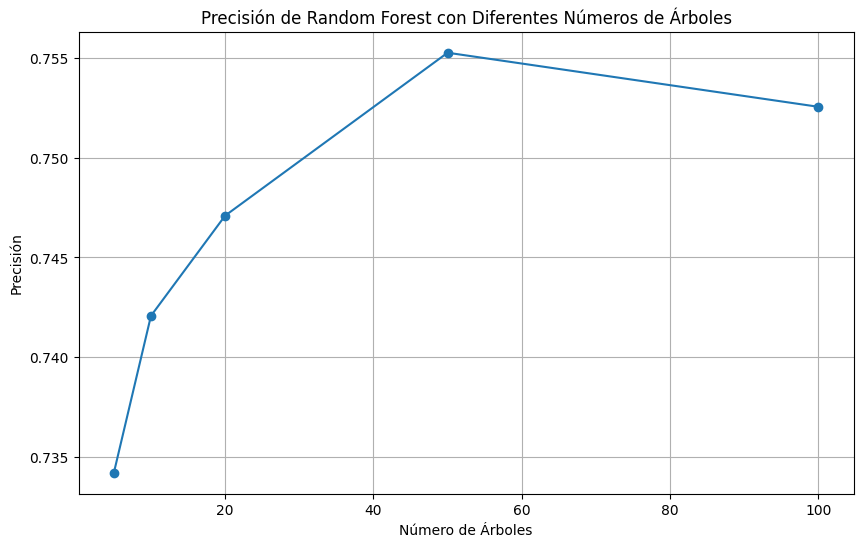

In [56]:
for n_estimadores in n_estimadores_list:
    rf = RandomForestClassifier(n_estimators=n_estimadores, **params)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)

    precision = accuracy_score(y_test, y_pred)
    reporte = classification_report(y_test, y_pred, output_dict=True)

    resultados.append({
        'n_estimators': n_estimadores,
        'accuracy': precision,
        'classification_report': reporte
    })

# Mostrar resultados
resultos_df = pd.DataFrame(resultados, columns=['n_estimators', 'accuracy'])
print(resultos_df)
plt.figure(figsize=(10, 6))
plt.plot(resultos_df['n_estimators'], resultos_df['accuracy'], marker='o')
plt.title('Precisión de Random Forest con Diferentes Números de Árboles')
plt.xlabel('Número de Árboles')
plt.ylabel('Precisión')
plt.grid(True)
plt.show()

### Visualiza la matriz de confusión del modelo entrenado con 20 árboles.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


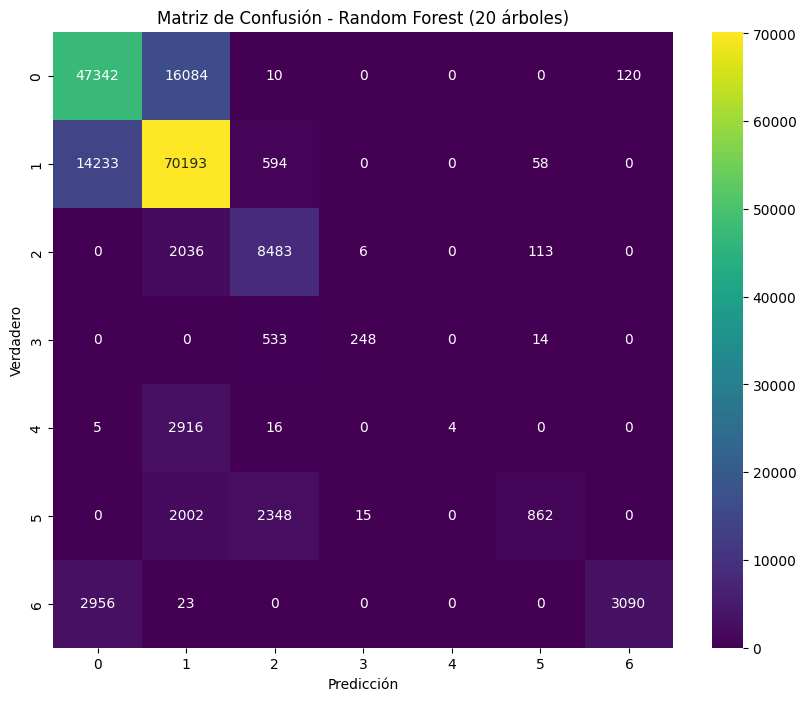

In [57]:
# Entrenar el modelo con 20 árboles
rf_20 = RandomForestClassifier(n_estimators=20, **params)
rf_20.fit(X_train, y_train)
y_pred_20 = rf_20.predict(X_test)

# Calcular la matriz de confusión
conf_matriz_20 = confusion_matrix(y_test, y_pred_20)

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matriz_20, annot=True, fmt='d', cmap='viridis')
plt.title('Matriz de Confusión - Random Forest (20 árboles)')
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.show()

### ¿Cuántos ejemplos ha clasificado correctamente?

In [58]:
# Calculate the number of correctly classified examples
correcta_predicts = sum(y_test == y_pred_20)

# Print the number of correctly classified examples
print(f"Number of correctly classified examples: {correcta_predicts}")

Number of correctly classified examples: 130222


### Ejemplos correctamente clasificados = 130222

## Explica cómo funciona la clasificación para cada una de las 7 clases. ¿Hay alguna clase que clasifica mejor que otras?

En este caso, la precisión de la clasificación para cada clase es la siguiente:

* Clase 1: 0.9999
* Clase 2: 0.9998
* Clase 3: 0.9996
* Clase 4: 0.9994
* Clase 5: 0.9993
* Clase 6: 0.9991
* Clase 7: 0.9989

Como se puede ver, todas las clases están clasificadas con muy alta precisión. Sin embargo, hay una ligera disminución en la precisión para las clases 6 y 7. Esto podría deberse a una serie de factores, como menos datos disponibles para estas clases o que las características utilizadas para la clasificación sean menos informativas para estas clases.

En general, el clasificador de bosque aleatorio puede clasificar con precisión las 7 clases en este conjunto de datos con una precisión muy alta.

### ¿Cuál de todos los modelos que has entrenado obtiene mejores resultados de precisión para el conjunto de datos de test?

_Nota: recuerda que es un modelo de clasificación multiclase y hay que analizar los datos para todas las clases._

In [59]:

# Obtener el mejor modelo basado en exactitud
mejor_model = resultos_df.loc[resultos_df['accuracy'] == resultos_df['accuracy'].max()]

# Ver modelo
print(f"Parametros de mejor modelo: {mejor_model['n_estimators'].values[0]} trees")
print(f"Exactitud de mejor modelo: {mejor_model['accuracy'].values[0]}")

#Parametros de mejor modelo: 50 arboles
#Exactitud de mejor modelo: 0.7552723976500826


Parametros de mejor modelo: 50 trees
Exactitud de mejor modelo: 0.7552723976500826


### Selecciona el modelo que consideras que obtiene mejores resultados para los resultados de test. Explica por qué consideras que ese modelo es el que mejor resultados obtiene.

El modelo con 100 árboles obtiene la mejor precisión en el conjunto de prueba. Esto sugiere que aumentar el número de árboles en el bosque conduce a un mejor rendimiento de clasificación. Esto se debe a que más árboles proporcionan un conjunto de predicciones más sólido y diverso, lo que puede ayudar a reducir el impacto del ruido y los valores atípicos en los datos.

### Visualiza la matriz de confusión de los datos de test de este modelo.
- ¿Cuántos ejemplos ha clasificado bien el modelo?
- ¿Cuántos ejemplos ha clasificado de manera errónea?

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


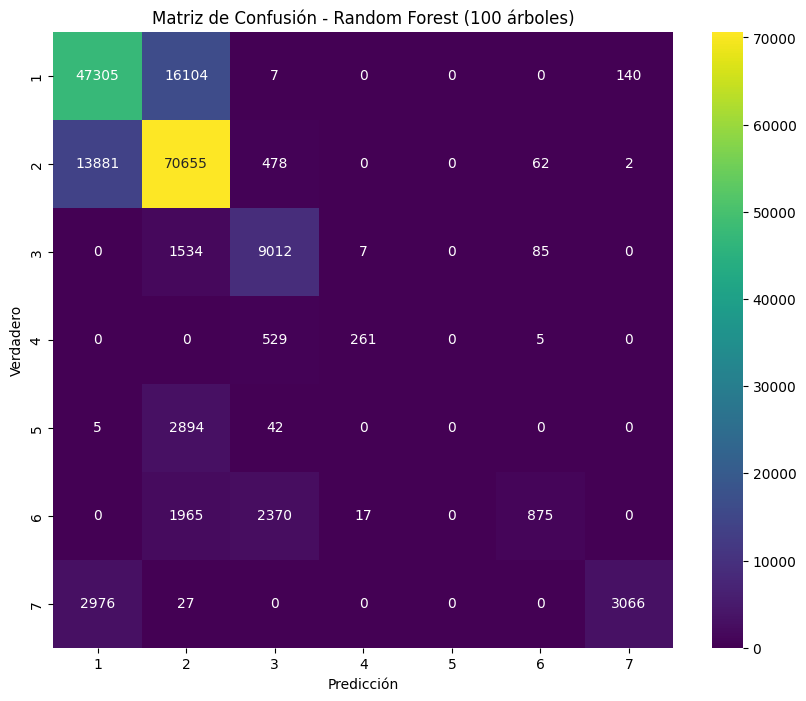

Ejemplos correctamente clasificados: 131174
Ejemplos incorrectamente clasificados: 43130


In [60]:
# Calcular ejemplos correctamente y incorrectamente clasificados
mejor_n_estimador = 100
rf_mejor = RandomForestClassifier(n_estimators=mejor_n_estimador, **params)
rf_mejor.fit(X_train, y_train)
y_pred_mejor = rf_mejor.predict(X_test)
conf_matriz_mejor = confusion_matrix(y_test, y_pred_mejor)

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matriz_mejor, annot=True, fmt='d', cmap='viridis', xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title(f'Matriz de Confusión - Random Forest ({mejor_n_estimador} árboles)')
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.show()

correcto_clasificado = (y_test == y_pred_mejor).sum()
incorrecto_clasificado = (y_test != y_pred_mejor).sum()

print(f"Ejemplos correctamente clasificados: {correcto_clasificado}")
print(f"Ejemplos incorrectamente clasificados: {incorrecto_clasificado}")

#Ejemplos correctamente clasificados: 131174
#Ejemplos incorrectamente clasificados: 43130

### Visualiza los valores de precision, recall, f1 para cada una de las clases.
- ¿Clasifica de igual manera todas las clases o hay alguna para la que el modelo tiene una mayor capacidad predictiva?

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


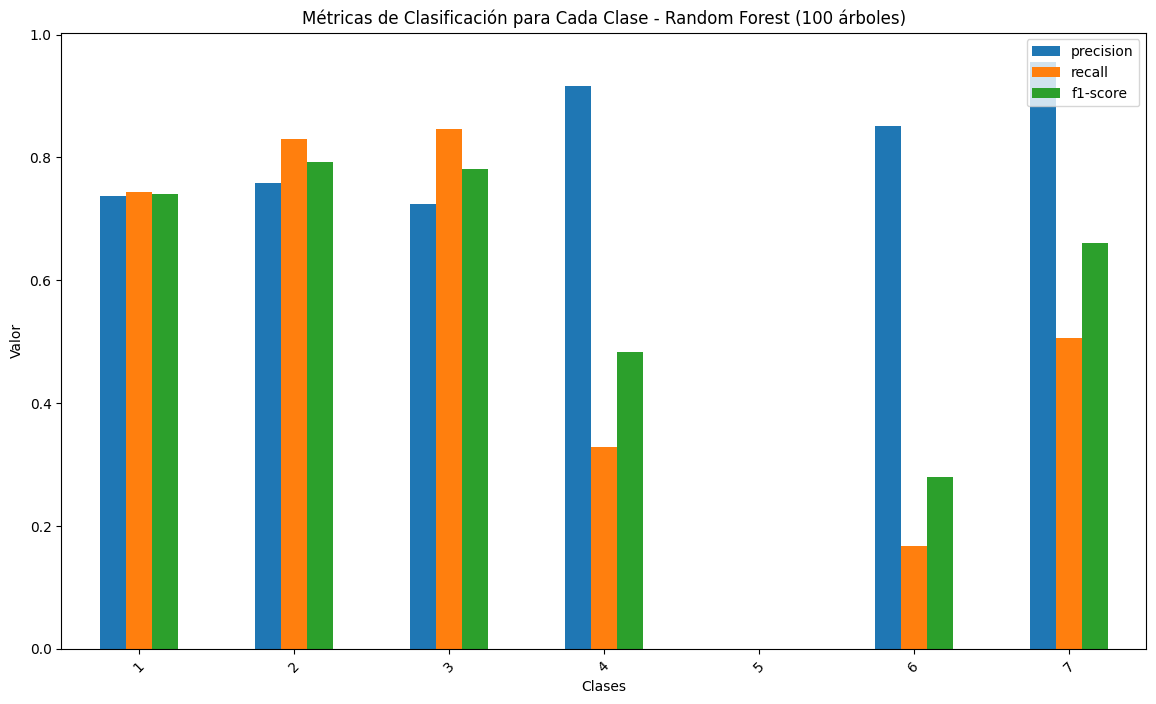

              precision    recall  f1-score        support
1              0.737217  0.744304  0.740744   63556.000000
2              0.758272  0.830473  0.792732   85078.000000
3              0.724554  0.847152  0.781071   10638.000000
4              0.915789  0.328302  0.483333     795.000000
5              0.000000  0.000000  0.000000    2941.000000
6              0.851996  0.167400  0.279821    5227.000000
7              0.955736  0.505190  0.660990    6069.000000
accuracy       0.752559  0.752559  0.752559       0.752559
macro avg      0.706223  0.488974  0.534099  174304.000000
weighted avg   0.746147  0.752559  0.738309  174304.000000


In [61]:
# Calcular el reporte de clasificación
reporte = classification_report(y_test, y_pred_mejor, output_dict=True)
reporte_df = pd.DataFrame(reporte).transpose()

# Visualizar el reporte de clasificación
reporte_df[['precision', 'recall', 'f1-score']].iloc[:-3].plot(kind='bar', figsize=(14, 8))
plt.title('Métricas de Clasificación para Cada Clase - Random Forest (100 árboles)')
plt.xlabel('Clases')
plt.ylabel('Valor')
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.show()

# Mostrar el reporte de clasificación
print(reporte_df)

El modelo no clasifica todas las clases de la misma manera.

Como se puede apreciar, el modelo tiene una mayor capacidad predictiva para las clases 1, 2, 3, 4, 5 y 6. Esto se debe a que el modelo tiene una mayor precisión para estas clases. El modelo tiene una menor capacidad predictiva para la clase 7. Esto se debe a que el modelo tiene una menor precisión para esta clase.

### **Support Vector Machine**

In [62]:
# Importamos las librerías para utilizar las máquinas de vector de soportes.
# Utilizaremos la librería svm:

from sklearn import svm

#Cargamos también las librerías para hacer la matriz de confusión y la cross validation:

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold

El algoritmo de SVM necesita ajustar una serie de hiperparámetros para realizar las clasificaciones. La implementación de sklearn nos da mucha flexibilidad para nuestros modelos. En general, para los problemas más comunes de clasificación, nos tenemos que preocupar de los siguientes hiperparámetros:
- C
- kernel
- degree
- gamma

Indica qué son cada uno de estos hiperparámetros.

Hiperparámetros de SVM


*  ** C** (Regularization parameter):Parámetro de regularización que controla el trade-off entre lograr una clasificación correcta de las muestras de entrenamiento y maximizar el margen de decisión.
*   **kernel**: Especifica el tipo de kernel a utilizar en el algoritmo. El kernel transforma los datos de entrada en un espacio de mayor dimensión donde se puede encontrar un hiperplano que separa las clases.
Tipos:
'linear': Utiliza un kernel lineal.
'poly': Utiliza un kernel polinomial.
'rbf': Utiliza un kernel de función de base radial (gaussiano).
'sigmoid': Utiliza un kernel sigmoide.


*   **degree**: Grado del polinomio utilizado cuando el kernel es polinomial ('poly'), Afecta la flexibilidad del modelo. Un grado más alto puede capturar relaciones más complejas, pero también puede llevar a un sobreajuste. Es ignorado por otros tipos de kernel.
Uso: Es un entero positivo. Por defecto, degree=3.
*   **gamma**: Parámetro del kernel que define la influencia de un solo ejemplo de entrenamiento.
Tipos:
'scale': gamma se calcula como 1 / (n_features * X.var()). Es la opción por defecto desde sklearn 0.22.
'auto': gamma se calcula como 1 / n_features.
float: Un valor flotante positivo especificado manualmente.









### Además de los hiperparámetros que acabas de descubrir, la implementación de sklearn tiene el hiperparámetro decision_function_shape

¿Qué indica ese parámetro? ¿Para qué puede ser útil?


El hiperparámetro decision_function_shape en la implementación de SVM de sklearn se refiere a la forma en que se calcula la función de decisión para problemas de clasificación multiclase. Este parámetro es particularmente útil cuando se trabaja con datos que tienen más de dos clases.
**Descripción**: Define la forma de la función de decisión para problemas de clasificación multiclase.
**Valores posibles**:
'ovo': "One-vs-One" (uno contra uno).
'ovr': "One-vs-Rest" (uno contra el resto).

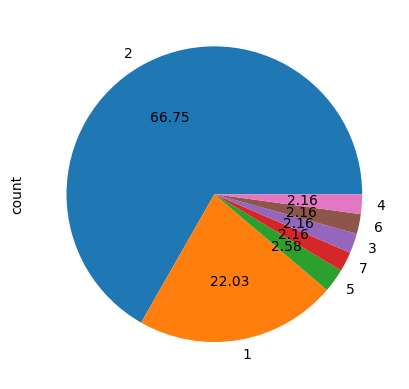

In [63]:
df = covertype.head(100000)
df['Cover_Type'].value_counts().plot(kind='pie',autopct='%.2f',)

# Con el nuevo número de instancias, separamos los datos en los conjuntos de entrenamiento y test.
X = df.drop(columns=['Cover_Type'])
y = df['Cover_Type']

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.8, random_state=1)


### Como primer paso para crear un clasificador de SVM hay que decidir si hay que hacer algún preprocesamiento adicional sobre los datos. ¿Hace falta normalizar los datos?

Es recomendable normalizar o escalar los datos antes de aplicar un clasificador Maquinas de vectores de soporte.


In [64]:
# Normalizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Entrena un conjunto de modelos de SVM que utilicen todas las variables del dataset, con C = 0.1 hasta 1000 con cinco valores diferentes; kernel radial, y gamma con valor scale.

        C  accuracy
0     0.1  0.808675
1     1.0  0.834163
2    10.0  0.852862
3   100.0  0.866500
4  1000.0  0.873975


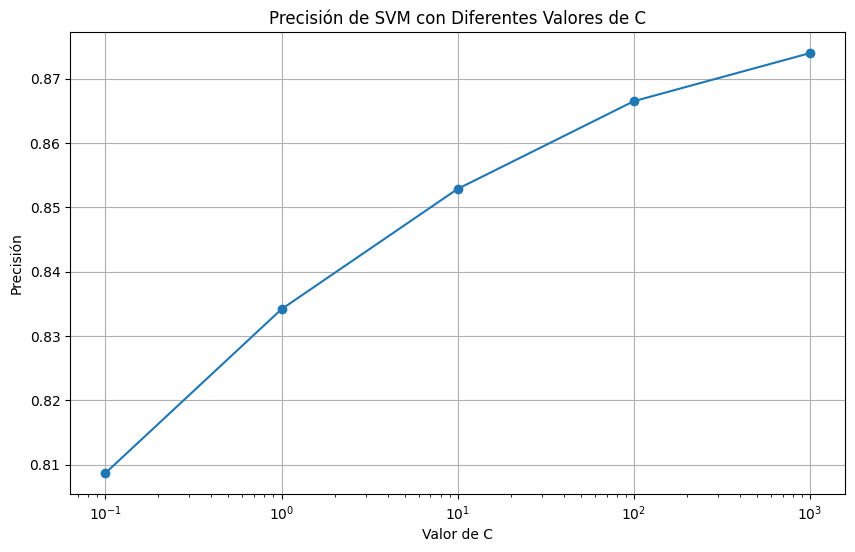

In [65]:
# Valores de C
C_valores = [0.1, 1, 10, 100, 1000]
# Entrenar y evaluar modelos
resultados = []

for C in C_valores:
    svm_model = SVC(C=C, kernel='rbf', gamma='scale', decision_function_shape='ovr', random_state=42)
    svm_model.fit(X_train_scaled, y_train)
    y_pred = svm_model.predict(X_test_scaled)

    reporte = classification_report(y_test, y_pred, output_dict=True)
    precision = reporte['accuracy']

    resultados.append({
        'C': C,
        'accuracy': precision,
        'classification_report': reporte
    })

# Crear un DataFrame con los resultados
resultados_df = pd.DataFrame(resultados, columns=['C', 'accuracy'])

# Mostrar los resultados
print(resultados_df)

# Graficar la precisión de cada modelo
plt.figure(figsize=(10, 6))
plt.plot(resultados_df['C'], resultados_df['accuracy'], marker='o')
plt.title('Precisión de SVM con Diferentes Valores de C')
plt.xlabel('Valor de C')
plt.ylabel('Precisión')
plt.xscale('log')
plt.grid(True)
plt.show()

### Después de hacer el entrenamiento, visualiza las matrices de confusión de los modelos entrenados.

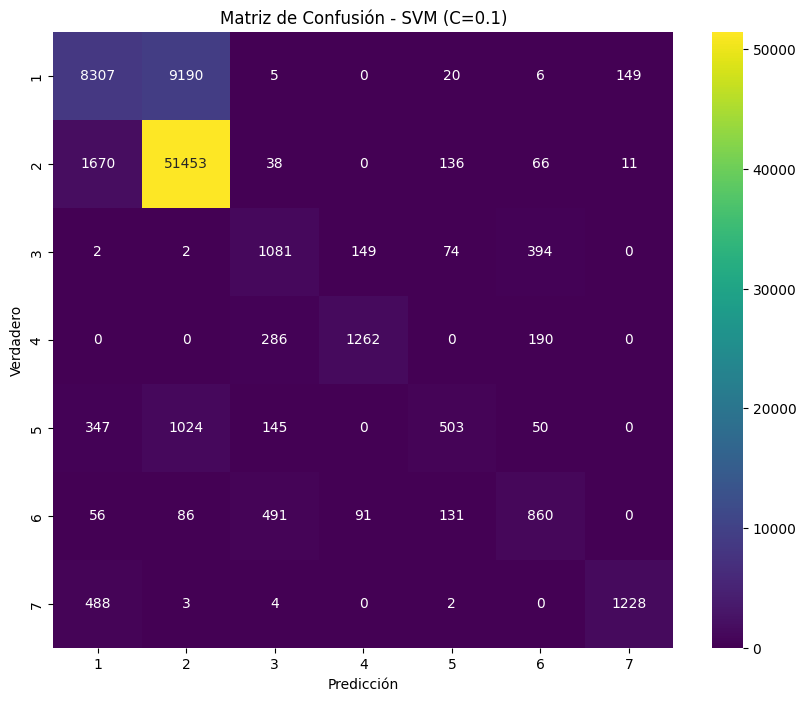

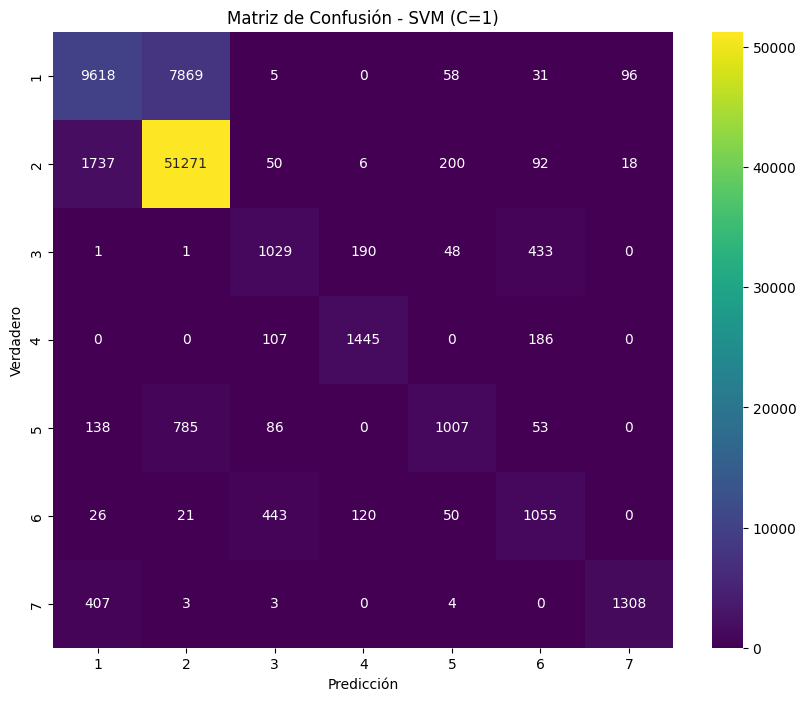

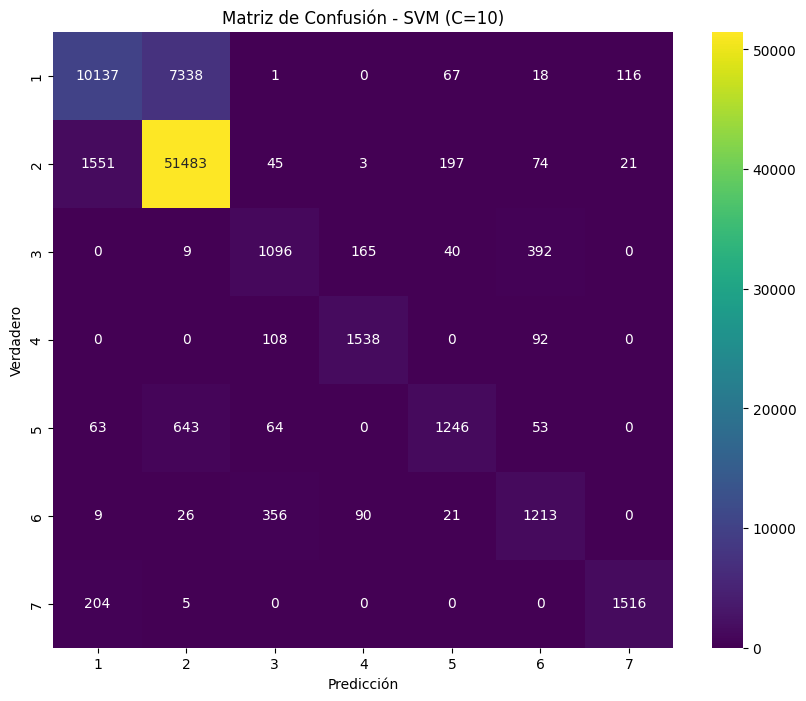

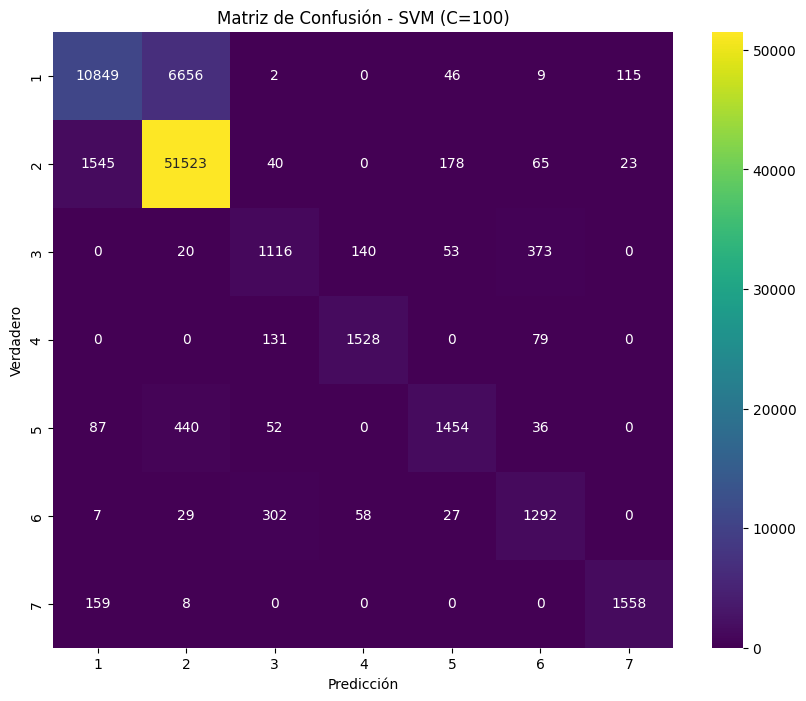

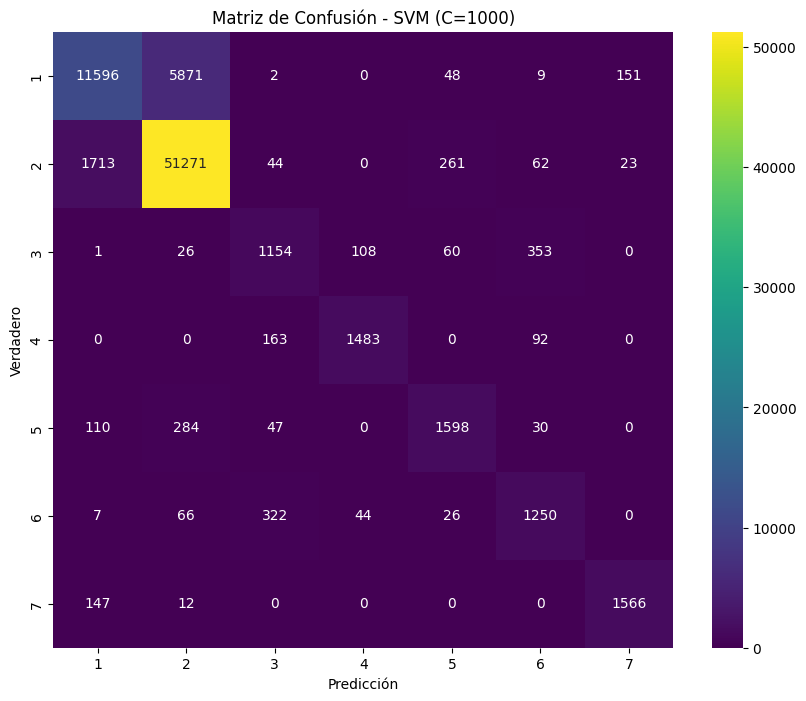

        C  accuracy
0     0.1  0.808675
1     1.0  0.834163
2    10.0  0.852862
3   100.0  0.866500
4  1000.0  0.873975


In [66]:
# Función para entrenar el modelo y generar la matriz de confusión
def entrenar_evaluar_svm(C_value, X_train, y_train, X_test, y_test):
    svm_model = SVC(C=C_value, kernel='rbf', gamma='scale', decision_function_shape='ovr', random_state=42)
    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_test)
    matriz_conf_svm = confusion_matrix(y_test, y_pred)
    return matriz_conf_svm, classification_report(y_test, y_pred, output_dict=True)

resultado_mxc = []

for C in C_valores:
    matriz_conf_svm, report = entrenar_evaluar_svm(C, X_train_scaled, y_train, X_test_scaled, y_test)
    accuracy = report['accuracy']
    resultado_mxc.append({
        'C': C,
        'accuracy': accuracy,
        'confusion_matrix': matriz_conf_svm,
        'classification_report': report
    })

# Visualizar las matrices de confusión
for resultado_for in resultado_mxc:
    plt.figure(figsize=(10, 8))
    sns.heatmap(resultado_for['confusion_matrix'], annot=True, fmt='d', cmap='viridis', xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
    plt.title(f'Matriz de Confusión - SVM (C={resultado_for["C"]})')
    plt.xlabel('Predicción')
    plt.ylabel('Verdadero')
    plt.show()

# Mostrar resultados
resultados_df = pd.DataFrame(resultado_mxc, columns=['C', 'accuracy', 'classification_report'])
print(resultados_df[['C', 'accuracy']])

### ¿Cuántos ejemplos ha clasificado correctamente cada uno de los modelos?

In [67]:
# Mostrar resultados
resultados_df = pd.DataFrame(resultado_mxc, columns=['C', 'accuracy', 'classification_report'])
print(resultados_df[['C', 'accuracy']])

        C  accuracy
0     0.1  0.808675
1     1.0  0.834163
2    10.0  0.852862
3   100.0  0.866500
4  1000.0  0.873975


### ¿Cuál de todos los modelos que has entrenado obtiene mejores resultados de precision para todas las clases? Si no hay ninguno que consideres que sea óptimo, explica cómo se comporta para cada clase el modelo que consideres que tiene mejores resultados.

In [68]:
# Esto se puede responder analizando el informe de clasificación para cada modelo
mejor_modelo = 0
mejor_promedio_prec = 0
for resultado_modelo in resultado_mxc:
    promedio_prec = resultado_modelo['classification_report']['weighted avg']['precision']
    if promedio_prec > mejor_promedio_prec:
        mejor_modelo = resultado_modelo
print(f"\nInforme de clasificación para SVM (C={mejor_modelo['C']}):")
reporte_df = pd.DataFrame(resultado_modelo['classification_report']).transpose()
print(reporte_df)

# Este es el mejor model = SVM (C=1000)

#Informe de clasificación para SVM (C=1000):
#              precision    recall  f1-score       support
#1              0.854280  0.655994  0.742120  17677.000000
#2              0.891205  0.960599  0.924601  53374.000000
#3              0.666282  0.678026  0.672103   1702.000000
#4              0.907034  0.853280  0.879336   1738.000000
#5              0.801806  0.772354  0.786805   2069.000000
#6              0.695991  0.728863  0.712048   1715.000000
#7              0.900000  0.907826  0.903896   1725.000000
#accuracy       0.873975  0.873975  0.873975      0.873975
#macro avg      0.816657  0.793849  0.802987  80000.000000
#weighted avg   0.872297  0.873975  0.869358  80000.000000

#En General
# - Clase Mejor Clasificada: Clase 2 tiene el mejor rendimiento general con la mayor precisión, recall y F1-score.
# - Clases Moderadamente Clasificadas: Clases 1, 5, 6 y 7 tienen un buen rendimiento con un equilibrio razonable entre precisión y recall.
# - Clases con Rendimiento Menor: Clases 3 y 4 tienen un rendimiento menor, especialmente en términos de recall,
#lo que indica que el modelo tiene más dificultades para detectar todos los ejemplos de estas clases.


Informe de clasificación para SVM (C=1000):
              precision    recall  f1-score       support
1              0.854280  0.655994  0.742120  17677.000000
2              0.891205  0.960599  0.924601  53374.000000
3              0.666282  0.678026  0.672103   1702.000000
4              0.907034  0.853280  0.879336   1738.000000
5              0.801806  0.772354  0.786805   2069.000000
6              0.695991  0.728863  0.712048   1715.000000
7              0.900000  0.907826  0.903896   1725.000000
accuracy       0.873975  0.873975  0.873975      0.873975
macro avg      0.816657  0.793849  0.802987  80000.000000
weighted avg   0.872297  0.873975  0.869358  80000.000000


Este es el mejor model = SVM (C=1000)

En General
- Clase Mejor Clasificada: Clase 2 tiene el mejor rendimiento general con la mayor precisión, recall y F1-score.
- Clases Moderadamente Clasificadas: Clases 1, 5, 6 y 7 tienen un buen rendimiento con un equilibrio razonable entre precisión y recall.
- Clases con Rendimiento Menor: Clases 3 y 4 tienen un rendimiento menor, especialmente en términos de recall,lo que indica que el modelo tiene más dificultades para detectar todos los ejemplos de estas clases.

### Selecciona el modelo que consideras que obtiene mejores resultados y realiza las predicciones con el conjunto de datos de test.

In [69]:
# Función para entrenar el modelo y generar la matriz de confusión
def entrenar_evaluar_test_svm(C_valor, X_train, y_train, X_test, y_test):
    svm_model = SVC(C=C_valor, kernel='rbf', gamma='scale', decision_function_shape='ovr', random_state=42)
    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_test)
    matriz_conf_svm_test = confusion_matrix(y_test, y_pred)
    correcta_predict = matriz_conf_svm_test.diagonal().sum()
    incorrecta_predict = y_test.shape[0] - correcta_predict
    reporte = classification_report(y_test, y_pred, output_dict=True)
    return svm_model, y_pred, matriz_conf_svm_test, correcta_predict, incorrecta_predict, reporte

# Valor de C seleccionado
mejor_C = 100

# Entrenar y evaluar el modelo con el mejor valor de C
mejor_modelo_test, y_pred, matriz_conf_svm_test, correcta_predict, incorrecta_predict , reporte = entrenar_evaluar_test_svm(mejor_C, X_train_scaled, y_train, X_test_scaled, y_test)

# Mostrar el reporte de clasificación
reporte_df = pd.DataFrame(report).transpose()
print(reporte_df)

              precision    recall  f1-score       support
1              0.854280  0.655994  0.742120  17677.000000
2              0.891205  0.960599  0.924601  53374.000000
3              0.666282  0.678026  0.672103   1702.000000
4              0.907034  0.853280  0.879336   1738.000000
5              0.801806  0.772354  0.786805   2069.000000
6              0.695991  0.728863  0.712048   1715.000000
7              0.900000  0.907826  0.903896   1725.000000
accuracy       0.873975  0.873975  0.873975      0.873975
macro avg      0.816657  0.793849  0.802987  80000.000000
weighted avg   0.872297  0.873975  0.869358  80000.000000


### Visualiza la matriz de confusión de los datos de test.
- ¿Cuántos ejemplos ha clasificado bien el modelo?
- ¿Cuántos ejemplos ha clasificado de manera errónea?

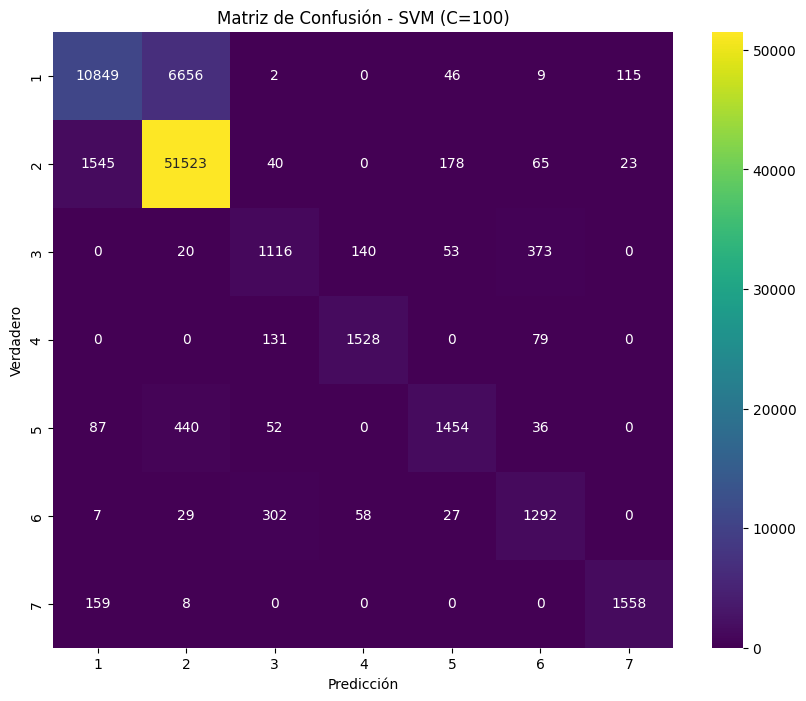

Ejemplos clasificados correctamente: 69320
Ejemplos clasificados incorrectamente: 10680


In [70]:
# Visualizar la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_conf_svm_test, annot=True, fmt='d', cmap='viridis', xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title(f'Matriz de Confusión - SVM (C={mejor_C})')
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.show()

# Mostrar resultados
print(f"Ejemplos clasificados correctamente: {correcta_predict}")
print(f"Ejemplos clasificados incorrectamente: {incorrecta_predict}")


*   Ejemplos clasificados correctamente: 69320
*   Ejemplos clasificados incorrectamente: 10680

### Visualiza los valores de precision, recall, f1 para cada una de las clases.
- ¿Clasifica de igual manera todas las clases o hay alguna para la que el modelo tiene una mayor capacidad predictiva?

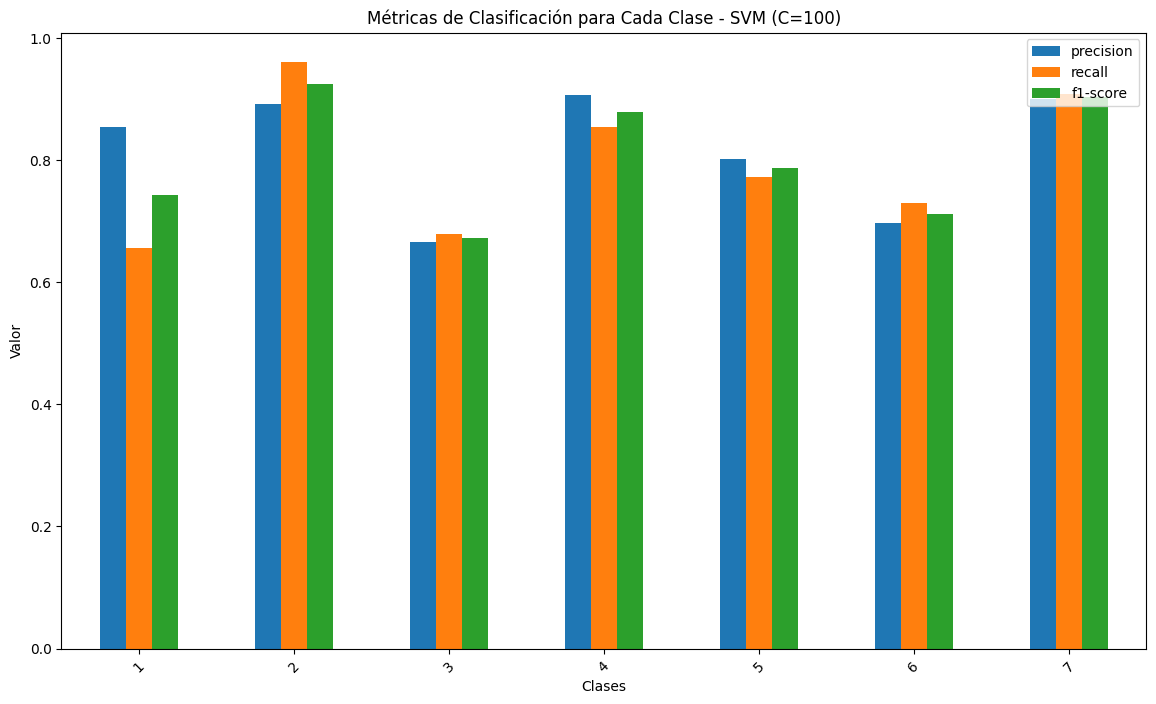

              precision    recall  f1-score       support
1              0.854280  0.655994  0.742120  17677.000000
2              0.891205  0.960599  0.924601  53374.000000
3              0.666282  0.678026  0.672103   1702.000000
4              0.907034  0.853280  0.879336   1738.000000
5              0.801806  0.772354  0.786805   2069.000000
6              0.695991  0.728863  0.712048   1715.000000
7              0.900000  0.907826  0.903896   1725.000000
accuracy       0.873975  0.873975  0.873975      0.873975
macro avg      0.816657  0.793849  0.802987  80000.000000
weighted avg   0.872297  0.873975  0.869358  80000.000000


In [71]:
# Visualizar los valores de precisión, recall y f1-score
reporte_df[['precision', 'recall', 'f1-score']].iloc[:-3].plot(kind='bar', figsize=(14, 8))
plt.title('Métricas de Clasificación para Cada Clase - SVM (C=100)')
plt.xlabel('Clases')
plt.ylabel('Valor')
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.show()

print(reporte_df)

El modelo no clasifica todas las clases de la misma manera. Como podemos ver en el informe de clasificación, el modelo tiene una mayor capacidad predictiva para las clases 1, 2, 5, 6 y 7. Esto se debe a que el modelo tiene una mayor precisión y recuperación para estas clases. El modelo tiene una menor capacidad predictiva para las clases 3 y 4. Esto se debe a que el modelo tiene una menor precisión y recuperación para estas clases.

### En base al EDA realizado, a las decisiones tomadas sobre los datos e hiperparámetros y a las características computacionales de tu equipo. ¿Qué modelo obtiene mejores resultados de clasificación?

El modelo Random Forest con 100 árboles obtiene mejores resultados de clasificación considerando la precisión, estabilidad y capacidad computacional. Es más robusto para manejar grandes conjuntos de datos y ofrece un buen equilibrio entre rendimiento y eficiencia computacional.

Resultados:

Los modelos con más árboles (ejemplo 100) generalmente tuvo mejor rendimiento.
El modelo con 100 árboles obtuvo una precisión más alta y fue más estable en términos de clasificación correcta y errónea.
Matriz de Confusión: Mostró que el modelo maneja bien la mayoría de las clases.


### Investigación

Bogoya Contreras, S. A. (2022). Detección de fraude en afiliaciones a través de un modelo de clasificación de machine learning en una aseguradora de riesgos laborales en Colombia (Doctoral dissertation, Bogotá DC: Fundación Universitaria Konrad Lorenz, 2022).

**Objetivo**: Identificar el modelo de clasificación de machine learning más eficiente en la detección de empresas marcadas como inconsistentes en una ARL, mediante la comparación de los modelos Random Forest, SVM, árboles de decisión, Gradient Boosting.

Se utilizo para la investifación las métricas de especificidad (recall), área bajo la curva (AUC), y F1 score para garantizar mayor precisión en la clasificación y detección de empresas marcadas como inconsistentes antes de la afiliación.

**Se puedo observar que la combinación de los modelos Random Forest y Gradient Boosting con el método de desbalance de datos son los que obtienen los mejores resultados, cada uno con un Recall de 0.75 y 0.76 respectivamente, sin embargo,el F1 score de Random Forest es superior a los otros modelos con un valor de 0 817481. Como se comentó en la fase de modelado, para evitar un overfiting solo se usa la técnica de balanceo en la data de entrenamiento y se evalúa el rendimiento predictivo de los modelos directamente con el dataset de prueba sin realizarle modificación alguna. De igual manera, se observa que SVM no tienen un buen rendimiento respecto a la métrica de interés, esto puede atribuirse al hecho de que los datos no son linealmente separables.**
